# Métodos Supervisados <a class="tocSkip">
### Laura Cristina López Bedoya <a class="tocSkip">
### Base de datos: Calidad_Vino.csv <a class="tocSkip">

In [1]:
# Importar librerias para la preparación y visualización de los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
#Leer el dataset
datos = pd.read_csv('Calidad_Vino.csv')
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Información de la tabla
#### Los datos están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde". Los datos disponibles son las variables fisicoquímicas (insumos) y sensoriales (la salida). Estos conjuntos de datos se pueden ver como una tarea de clasificación o regresión.

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol

#### DATOS DE SALIDA:
- Quality (Calidad del vino, puntaje entre 0 y 10)

# Descripción de datos

In [3]:
datos.dtypes #Conocer de que tipo son las variables

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [4]:
datos.shape #Número de filas y columnas del dataset.

(1785, 12)

In [5]:
datos.describe() #Descripción de los datos numéricos del dataset.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1769.000000,1769.000000,1769.000000,1769.000000,1785.000000,1784.000000,1773.000000,1768.000000,1767.000000,1766.000000,1769.000000,1757.000000
mean,8.293951,88.041447,0.271747,2.533550,57.020561,16.011771,46.287084,50.584000,3.313237,0.656133,10.409855,5.626636
std,1.784864,238.000328,0.194148,1.375419,55.139796,10.436539,32.717792,216.723892,0.154152,0.166146,1.054853,0.801150
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.090000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.800000,0.530000,0.260000,2.200000,68.000000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.660000,0.430000,2.600000,83.000000,22.000000,62.000000,0.998155,3.405000,0.730000,11.066667,6.000000
max,15.900000,1185.000000,1.000000,15.500000,611.000000,72.000000,289.000000,1001.000000,4.010000,2.000000,14.900000,8.000000


In [6]:
datos.dropna().shape #Si se eliminan las filas y columnas donde hay datos faltantes el tamaño del dataset se reduce a:

(1729, 12)

In [7]:
datos.info() # Información general de los datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 12 columns):
fixed acidity           1769 non-null float64
volatile acidity        1769 non-null float64
citric acid             1769 non-null float64
residual sugar          1769 non-null float64
chlorides               1785 non-null float64
free sulfur dioxide     1784 non-null float64
total sulfur dioxide    1773 non-null float64
density                 1768 non-null float64
pH                      1767 non-null float64
sulphates               1766 non-null float64
alcohol                 1769 non-null float64
quality                 1757 non-null float64
dtypes: float64(12)
memory usage: 167.4 KB


In [8]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos. 

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

La columna chlorides no tiene datos nulos.

In [9]:
datos.isnull().any(axis=1).value_counts() #Número total de filas con datos nulos en el dataset

False    1729
True       56
dtype: int64

# Visualización de datos

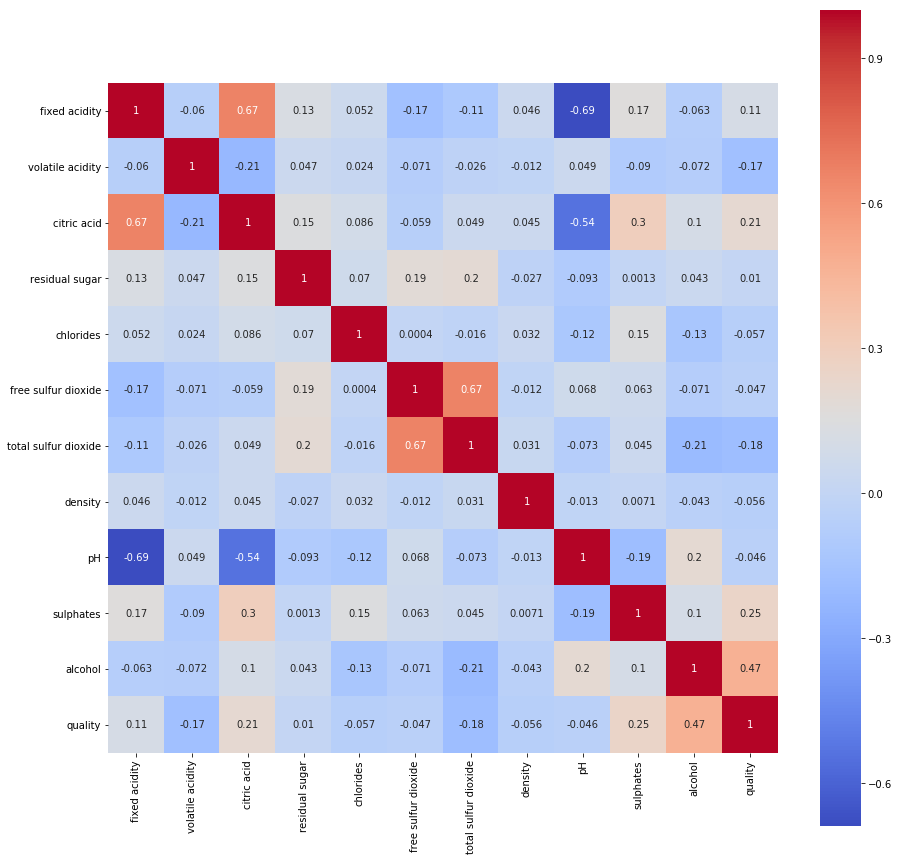

In [10]:
plt.figure(figsize=(15,15)) #Mapa de calor de la correlación de las variables del dataset
sns.heatmap(datos.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

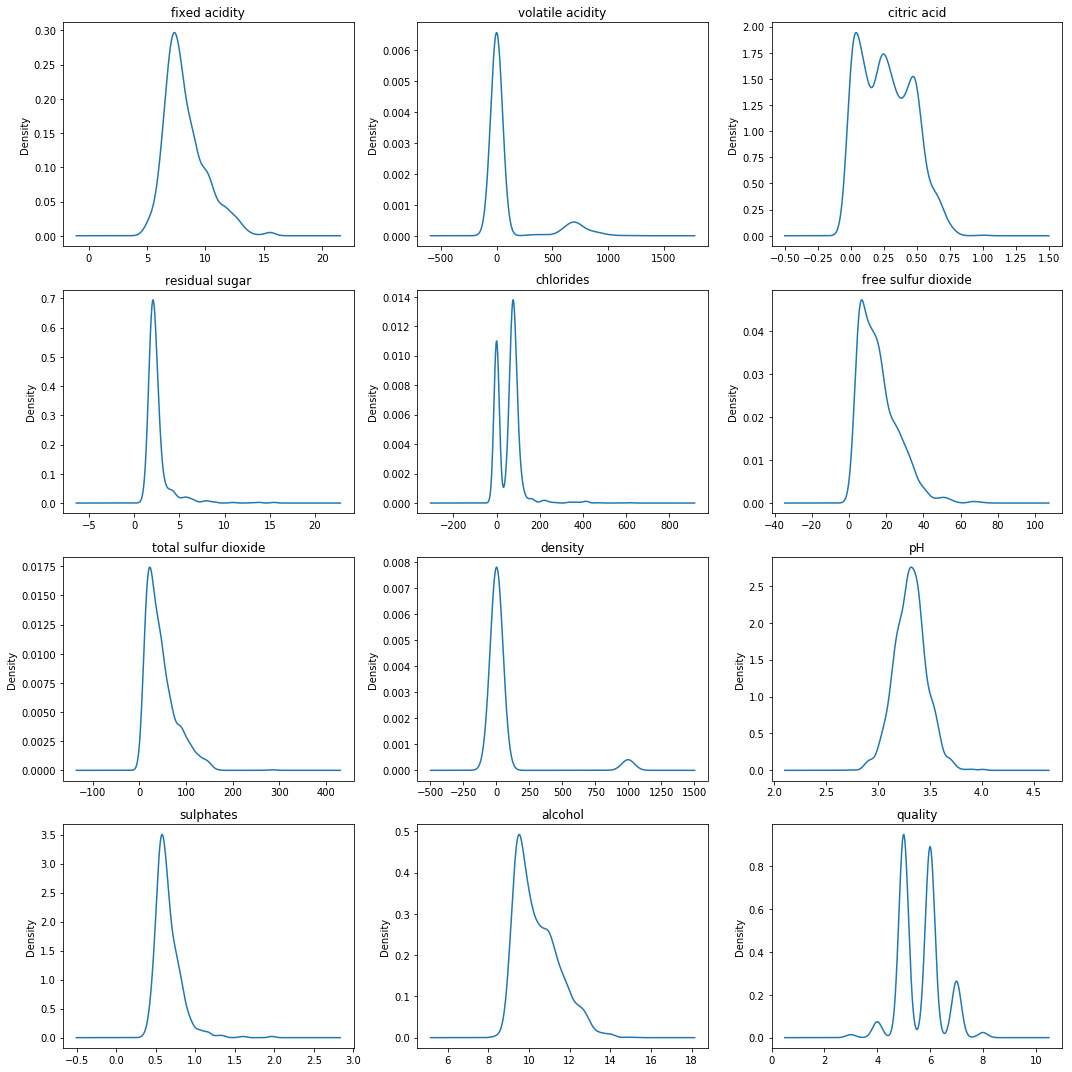

In [11]:
#Gráfica kde de cada una de las variables
plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
datos['fixed acidity'].plot.kde(); 
plt.title("fixed acidity");

plt.subplot(4,3,2)
datos['volatile acidity'].plot.kde(); 
plt.title("volatile acidity");

plt.subplot(4,3,3)
datos['citric acid'].plot.kde(); 
plt.title("citric acid");

plt.subplot(4,3,4)
datos['residual sugar'].plot.kde(); 
plt.title("residual sugar");

plt.subplot(4,3,5)
datos['chlorides'].plot.kde(); 
plt.title("chlorides");

plt.subplot(4,3,6)
datos['free sulfur dioxide'].plot.kde(); 
plt.title("free sulfur dioxide");

plt.subplot(4,3,7)
datos['total sulfur dioxide'].plot.kde(); 
plt.title("total sulfur dioxide");

plt.subplot(4,3,8)
datos['density'].plot.kde(); 
plt.title("density");

plt.subplot(4,3,9)
datos['pH'].plot.kde(); 
plt.title("pH");

plt.subplot(4,3,10)
datos['sulphates'].plot.kde(); 
plt.title("sulphates");

plt.subplot(4,3,11)
datos['alcohol'].plot.kde(); 
plt.title("alcohol");

plt.subplot(4,3,12)
datos['quality'].plot.kde(); 
plt.title("quality");

plt.tight_layout()

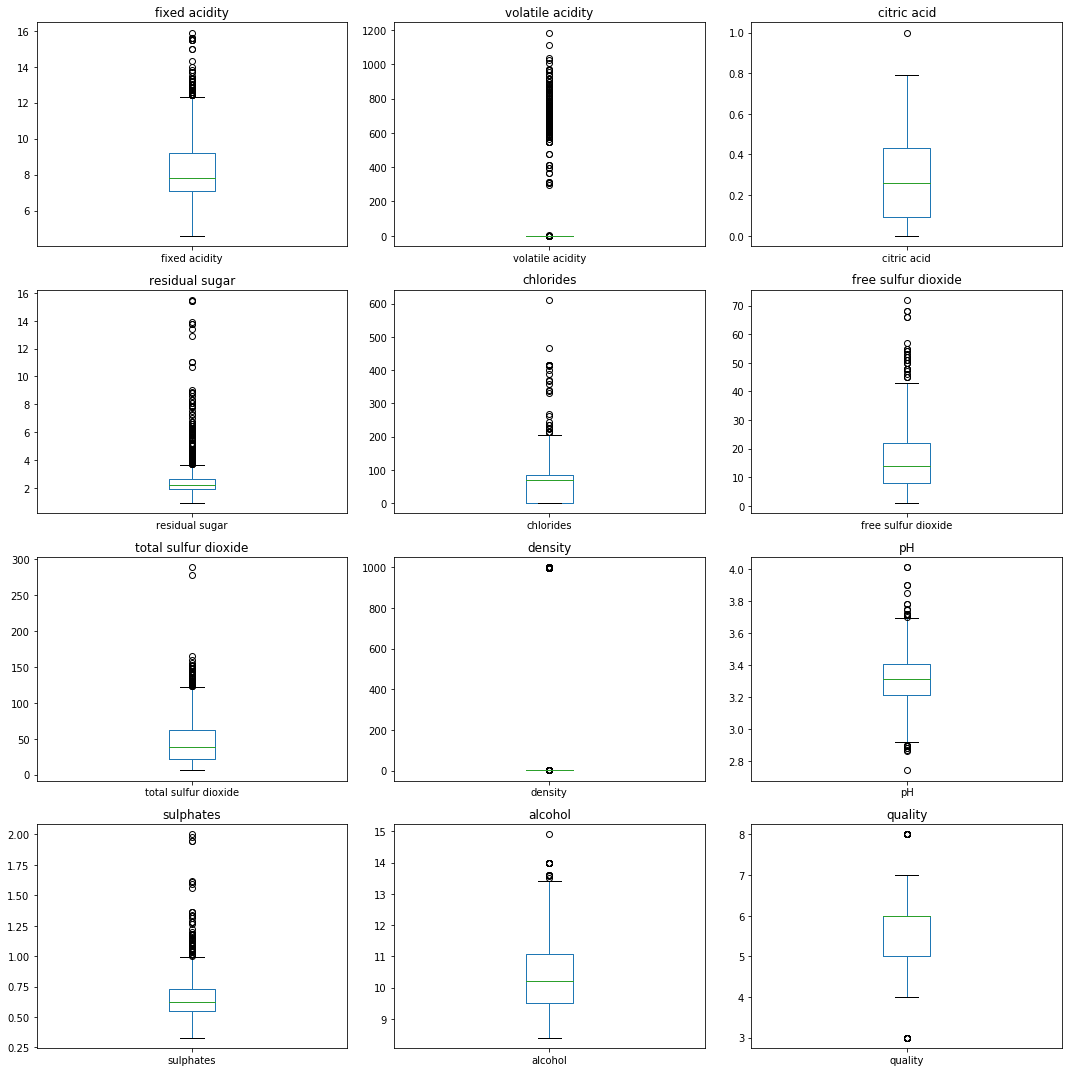

In [12]:
#Gráfica boxplot de cada variable para identificar los datos atípicos
plt.figure(figsize=(15,15))
      
plt.subplot(4,3,1)
datos['fixed acidity'].plot.box(); 
plt.title("fixed acidity");

plt.subplot(4,3,2)
datos['volatile acidity'].plot.box(); 
plt.title("volatile acidity");

plt.subplot(4,3,3)
datos['citric acid'].plot.box(); 
plt.title("citric acid");

plt.subplot(4,3,4)
datos['residual sugar'].plot.box(); 
plt.title("residual sugar");

plt.subplot(4,3,5)
datos['chlorides'].plot.box(); 
plt.title("chlorides");

plt.subplot(4,3,6)
datos['free sulfur dioxide'].plot.box(); 
plt.title("free sulfur dioxide");

plt.subplot(4,3,7)
datos['total sulfur dioxide'].plot.box(); 
plt.title("total sulfur dioxide");

plt.subplot(4,3,8)
datos['density'].plot.box(); 
plt.title("density");

plt.subplot(4,3,9)
datos['pH'].plot.box(); 
plt.title("pH");

plt.subplot(4,3,10)
datos['sulphates'].plot.box(); 
plt.title("sulphates");

plt.subplot(4,3,11)
datos['alcohol'].plot.box(); 
plt.title("alcohol");

plt.subplot(4,3,12)
datos['quality'].plot.box(); 
plt.title("quality");

plt.tight_layout()

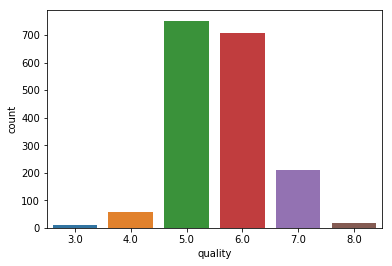

In [13]:
sns.countplot(x='quality',data=datos); #Gráfica de los datos de salida. 

Se observa que los datos están desbalanceados. 

## Preparación de datos
#### Transformación de variables
- Se identifican los cuartiles y el comportamiento de las variables con el fin de eliminar datos atípicos. 
- Dependiendo del comportamiento de la variable, los datos atípicos se pueden reducir al valor del cuartil superior o inferior, si el comportamiento es lineal se dividen por un número entero para re-escalar y si el comportamiento es exponencial se aplica logaritmo natural para reducirlo.

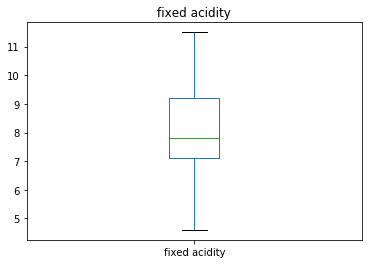

In [14]:
for x in range (0,len(datos)):
    if datos['fixed acidity'][x] > 11.5:
        datos['fixed acidity'][x] = 11.5

datos['fixed acidity'].plot.box(); 
plt.title("fixed acidity");

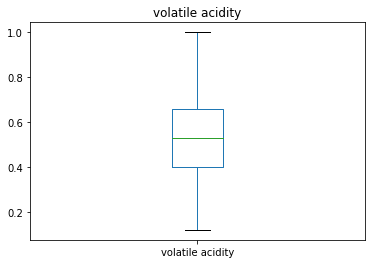

In [15]:
for y in range (0,len(datos)):
    if datos['volatile acidity'][y] > 200:
        datos['volatile acidity'][y] = math.log(datos['volatile acidity'][y])
        
for x in range (0,len(datos)):
    if datos['volatile acidity'][x] > 1.0:
        datos['volatile acidity'][x] = 1.0
        
datos['volatile acidity'].plot.box(); 
plt.title("volatile acidity");

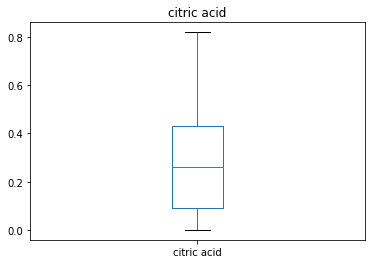

In [16]:
for x in range (0,len(datos)):
    if datos['citric acid'][x] > (datos['citric acid'].quantile(0.75) + (1.5 * datos['citric acid'].quantile(0.5))):
        datos['citric acid'][x] = (datos['citric acid'].quantile(0.75) + (1.5 * datos['citric acid'].quantile(0.5)))
        
datos['citric acid'].plot.box(); 
plt.title("citric acid");

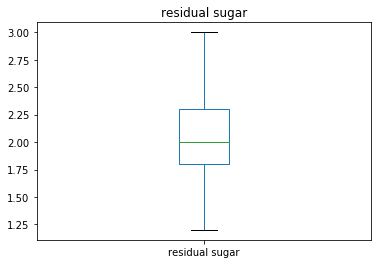

In [17]:
for y in range (0,len(datos)):
    if datos['residual sugar'][y] > 3:
        datos['residual sugar'][y] = math.log(datos['residual sugar'][y])
        
for x in range (0,len(datos)):
    if datos['residual sugar'][x] < 1.2:
        datos['residual sugar'][x] = 1.2
        
datos['residual sugar'].plot.box();
plt.title("residual sugar");

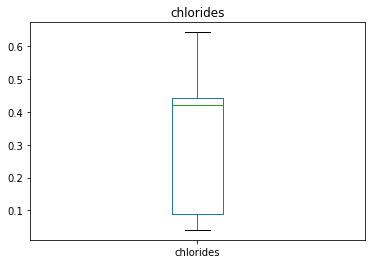

In [18]:
for y in range (0,len(datos)):
    if datos['chlorides'][y] > 1:
        datos['chlorides'][y] = math.log(datos['chlorides'][y])       

for x in range (0,len(datos)):
    if datos['chlorides'][x] > 1:
        datos['chlorides'][x] = (datos['chlorides'][x]/10)
        
datos['chlorides'].plot.box(); 
plt.title("chlorides");

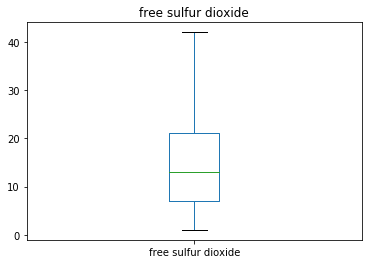

In [19]:
for y in range (0,len(datos)):
    if datos['free sulfur dioxide'][y] > 42:
        datos['free sulfur dioxide'][y] = math.log(datos['free sulfur dioxide'][y])
        
datos['free sulfur dioxide'].plot.box(); 
plt.title("free sulfur dioxide");

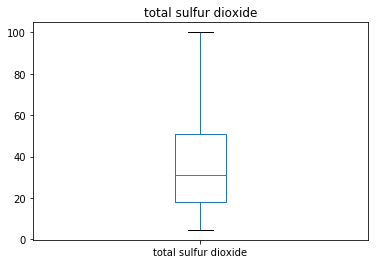

In [20]:
for x in range (0,len(datos)):
    if datos['total sulfur dioxide'][x] > 100:
        datos['total sulfur dioxide'][x] = math.log(datos['total sulfur dioxide'][x])
        
datos['total sulfur dioxide'].plot.box(); 
plt.title("total sulfur dioxide");

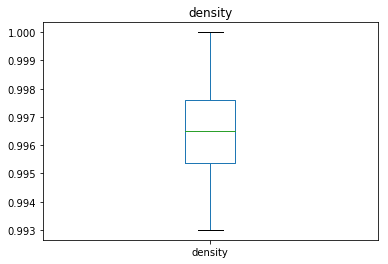

In [21]:
for x in range (0,len(datos)):
    if datos['density'][x] > 1:
        datos['density'][x] = datos['density'][x]/1000
        
for x in range (0,len(datos)):
    if datos['density'][x] < 0.993:
        datos['density'][x] = 0.993

for x in range (0,len(datos)):
    if datos['density'][x] > 1:
        datos['density'][x] = 1  

datos['density'].plot.box(); 
plt.title("density");

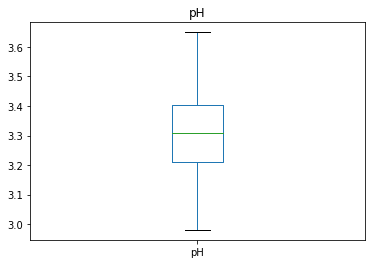

In [22]:
for x in range (0,len(datos)):
    if datos['pH'][x] > 3.65:
        datos['pH'][x] = 3.65
        
for x in range (0,len(datos)):
    if datos['pH'][x] < 2.98:
        datos['pH'][x] = 2.98
        
datos['pH'].plot.box(); 
plt.title("pH");

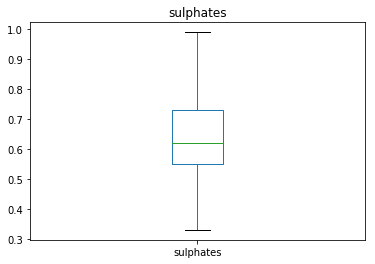

In [23]:
for x in range (0,len(datos)):
    if datos['sulphates'][x] > 0.99:
        datos['sulphates'][x] = 0.99
        
datos['sulphates'].plot.box(); 
plt.title("sulphates");

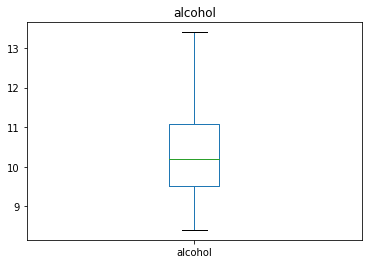

In [24]:
for x in range (0,len(datos)):
    if datos['alcohol'][x] > 13.4:
        datos['alcohol'][x] = 13.4
        
datos['alcohol'].plot.box(); 
plt.title("alcohol");

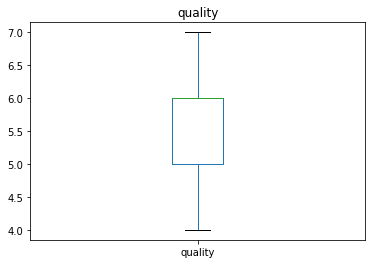

In [25]:
for x in range (0,len(datos)):
    if datos['quality'][x] > 7:
        datos['quality'][x] = 7
        
for x in range (0,len(datos)):
    if datos['quality'][x] < 4:
        datos['quality'][x] = 4
        
datos['quality'].plot.box(); 
plt.title("quality");

In [26]:
datos[datos.duplicated()] #Visualizar los valores duplicados en el dataset.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.70,0.00,1.900000,0.433073,11.000000,34.000000,0.99780,3.51,0.56,9.4,5.0
11,7.5,0.50,0.36,1.808289,0.426268,17.000000,4.624973,0.99780,3.35,0.80,10.5,5.0
27,7.9,0.43,0.21,1.600000,0.466344,10.000000,37.000000,0.99660,3.17,0.91,9.5,5.0
40,7.3,0.45,0.36,1.774952,0.074000,12.000000,87.000000,0.99780,3.33,0.83,10.5,5.0
65,7.2,1.00,0.05,1.536867,0.445435,4.000000,11.000000,0.99620,3.41,0.39,10.9,5.0
76,8.8,0.41,0.64,2.200000,0.093000,9.000000,42.000000,0.99860,3.54,0.66,10.5,5.0
91,8.6,0.49,0.28,1.900000,0.110000,20.000000,4.912655,0.99720,2.98,0.99,9.9,6.0
93,7.7,0.49,0.26,1.900000,0.412713,9.000000,31.000000,0.99660,3.39,0.64,9.6,5.0
102,8.1,1.00,0.18,1.900000,0.080000,13.000000,35.000000,0.99720,3.30,0.59,9.0,6.0
105,8.1,1.00,0.22,2.100000,0.434381,12.000000,65.000000,0.99670,3.29,0.51,9.2,5.0


 Podemos observar que las filas 236 y 238 son iguales.

In [27]:
datos.drop_duplicates(keep='last', inplace=True) #Se eliminan los datos duplicados, conservando la ultima fila duplicada. 
datos.shape #El tamaño del dataset se reduce a:

(1412, 12)

In [28]:
datos.duplicated() #Comprobar si no hay valores duplicados

1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
        ...  
1752    False
1753    False
1754    False
1755    False
1756    False
1757    False
1758    False
1759    False
1760    False
1762    False
1763    False
1764    False
1765    False
1766    False
1767    False
1768    False
1769    False
1770    False
1772    False
1773    False
1774    False
1775    False
1776    False
1777    False
1778    False
1779    False
1780    False
1781    False
1783    False
1784    False
Length: 1412, dtype: bool

In [29]:
datos.isnull().any(axis=0) #Verificar si se eliminaron valores nulos con los duplicados

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

In [30]:
datos[datos.isnull().any(axis=1)] #Observar las filas que tienen valores nulos para definir cuales pueden ser eliminadas si tienen muchos datos faltantes.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1527,7.1,0.53,0.07,1.700000,0.426268,15.0,24.000000,0.99510,3.29,0.66,10.8,NaN
1529,7.1,0.69,0.08,2.100000,0.414313,42.0,52.000000,0.99608,3.42,0.60,10.2,NaN
1531,6.1,1.00,0.10,2.800000,0.439445,13.0,28.000000,0.99631,3.60,0.66,10.2,NaN
1533,8.0,0.39,0.30,1.900000,0.074000,32.0,84.000000,0.99717,3.39,0.61,9.0,NaN
1535,7.0,0.55,0.13,2.200000,0.431749,15.0,35.000000,0.99590,3.36,0.59,9.7,NaN
1537,5.4,0.58,0.08,1.900000,0.059000,20.0,31.000000,0.99484,3.50,0.64,10.2,NaN
1539,7.2,0.39,0.32,1.800000,0.417439,34.0,60.000000,0.99714,3.46,0.78,9.9,NaN
1544,8.4,0.37,0.43,2.300000,0.414313,12.0,19.000000,NaN,NaN,NaN,NaN,7.0
1545,6.5,0.63,0.33,1.800000,0.059000,16.0,28.000000,NaN,NaN,NaN,NaN,6.0
1546,7.0,0.57,0.02,2.000000,0.072000,17.0,26.000000,NaN,NaN,NaN,NaN,NaN


In [31]:
datos.dropna(thresh=4,inplace=True) #Se eliminan las filas que tengan 4 o más valores nulos.
datos.shape #El tamaño del dataset se reduce a:

(1410, 12)

In [32]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

In [33]:
datos.isnull().any(axis=1).value_counts() #El número total de filas con valores nulos en el dataset es de 53, se eliminaron 3 en la transformacion de datos

False    1357
True       53
dtype: int64

In [34]:
#Llenar los valores nulos con la media de cada columna. 
datos['fixed acidity'] = datos['fixed acidity'].fillna(datos['fixed acidity'].median()) 
datos['volatile acidity'] = datos['volatile acidity'].fillna(datos['volatile acidity'].median())
datos['citric acid'] = datos['citric acid'].fillna(datos['citric acid'].median())
datos['residual sugar'] = datos['residual sugar'].fillna(datos['residual sugar'].median())
datos['free sulfur dioxide'] = datos['free sulfur dioxide'].fillna(datos['free sulfur dioxide'].median())
datos['total sulfur dioxide'] = datos['total sulfur dioxide'].fillna(datos['total sulfur dioxide'].median())
datos['density'] = datos['density'].fillna(datos['density'].median())
datos['pH'] = datos['pH'].fillna(datos['pH'].median())
datos['sulphates'] = datos['sulphates'].fillna(datos['sulphates'].median())
datos['alcohol'] = datos['alcohol'].fillna(datos['alcohol'].median())

In [35]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [36]:
datos.dropna(inplace=True)
datos.shape #Se eliminan las filas donde hay datos faltantes, debido a que quedan datos faltantes en la predicción y no es posible llenarlos con algun valor. El tamaño del dataset se reduce a:

(1385, 12)

In [37]:
datos.isnull().any(axis=0) #Verificar que el dataset no tenga datos faltantes

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [38]:
datos.describe() #Descripción de los datos numéricos del dataset.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,8.225054,0.561155,0.271877,2.055225,0.319610,15.054271,36.761224,0.996435,3.310419,0.648664,10.426390,5.618051
std,1.569493,0.223622,0.193863,0.431800,0.171074,9.265741,24.229481,0.001700,0.146403,0.135202,1.062818,0.771114
min,4.600000,0.120000,0.000000,1.200000,0.041000,1.000000,4.615121,0.993000,2.980000,0.330000,8.400000,4.000000
25%,7.100000,0.390000,0.100000,1.800000,0.090000,7.000000,18.000000,0.995400,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.000000,0.421951,13.000000,31.000000,0.996520,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.660000,0.420000,2.400000,0.441884,21.000000,52.000000,0.997600,3.400000,0.720000,11.100000,6.000000
max,11.500000,1.000000,0.820000,3.000000,0.641510,42.000000,100.000000,1.000000,3.650000,0.990000,13.400000,7.000000


# Metodos supervisados

In [2]:
import warnings #Ocultar las advertencias al aplicar un método
warnings.filterwarnings("ignore")

In [40]:
cols = datos.columns.values #Se guardan los nombres de las columnas del dataset
x = datos[cols[:-1]] # x son las columnas que ayudarán a la predicción
y = datos[cols[-1:]] #y es la columna de salida "quality"

In [41]:
#Balancear datos
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x,y = smt.fit_sample(x,y)

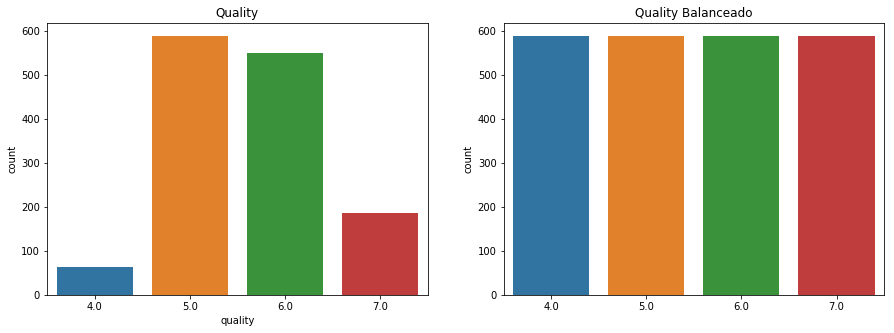

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='quality',data=datos); #Visualizar los datos de salida luego de la preparación de los datos.
plt.title("Quality");

plt.subplot(1,2,2)
sns.countplot(x=y); #Visualizar los datos de salida balanceados.
plt.title("Quality Balanceado");

## Predicción

In [3]:
#Importar librerias para aplicar metodos de evaluación de los algoritmos que se implementarán.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
#importar librerias de sklearn para metodos de predicción. 
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

Método:  1 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
El error cuadrático medio es: 0.766511625161285
r2_score:  0.5299679427940845
Cross-Validation:  0.3053660593367171


Método:  2 DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
El error cuadrático medio es: 0.2541734644315163
r2_score:  0.9483166799831045
Cross-Validation:  0.4335683177951082


Método:  3 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False

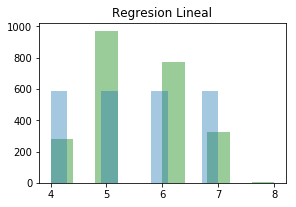

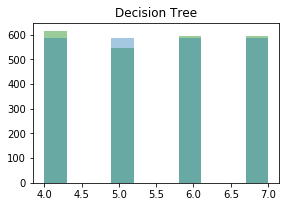

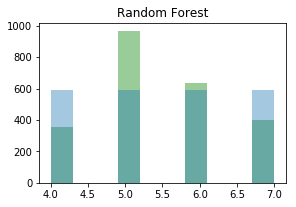

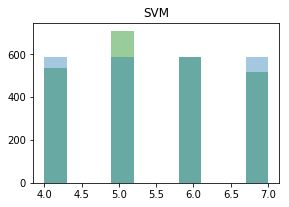

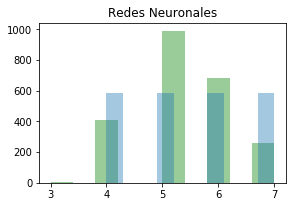

In [45]:
#Aplicar los metodos de predicción a los datos para entrenarlos y evaluar el resultado.
#Las metricas usadas para evaluar el sistema son el mean squared error y el r2_score.
#A cada método se le aplica Cross-validation.
#Por último se grafica el resultado comparando la "y" de salida con "y_pred" del resultado de la predicción. 
met = [linear_model.LinearRegression(),DecisionTreeRegressor(max_depth=11,random_state=1),
       RandomForestRegressor(max_depth=4,random_state=1),SVR(),MLPRegressor()]
m = ['Regresion Lineal','Decision Tree','Random Forest','SVM','Redes Neuronales']
for i in range (0,len(met)):
    met[i].fit(x,y) # Se entrena el método implementado
    y_pred=met[i].predict(x) #Se realiza una predicción
    rms = np.sqrt(metrics.mean_squared_error(y,y_pred))
    print ('Método: ',i+1,met[i])
    print ('El error cuadrático medio es:',rms)
    scorer = r2_score(y, y_pred) 
    print ('r2_score: ',scorer)
    scores = cross_val_score(met[i], x, y, cv=10)
    s = np.mean(np.sqrt(abs(scores)))
    print ('Cross-Validation: ',s)
    print ('\n')
      
    for j in range (0,len(y_pred)):
        y_pred[j]=round(y_pred[j])
    
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i+1)
    plt.hist(y_pred,alpha=0.4,color='green')
    plt.hist(y,alpha=0.4)
    a = m[i]
    plt.title(a)

## Clasificación

In [5]:
#Importar librerias para usar metricas de evaluación de los metodos de clasificación
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [6]:
#Importar librerias para implementar metodos de clasificación.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

Método:  1 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy:  0.5803571428571429
Cross-Validation:  0.7507017390711834
Confusion_matrix: 
 [[438 122  10  18]
 [170 316  57  45]
 [ 89 177 112 210]
 [ 22  15  52 499]]
Classification_report: 
               precision    recall  f1-score   support

         4.0       0.61      0.74      0.67       588
         5.0       0.50      0.54      0.52       588
         6.0       0.48      0.19      0.27       588
         7.0       0.65      0.85      0.73       588

   micro avg       0.58      0.58      0.58      2352
   macro avg       0.56      0.58      0.55      2352
weighted avg       0.56      0.58      0.55      2352



Método:  2 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr

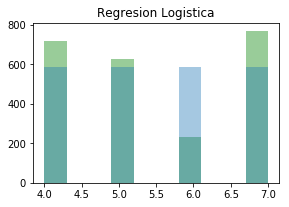

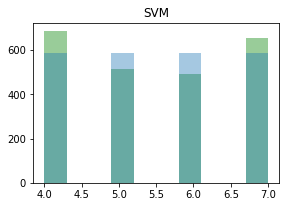

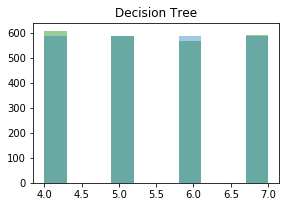

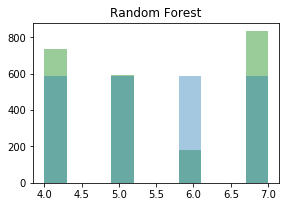

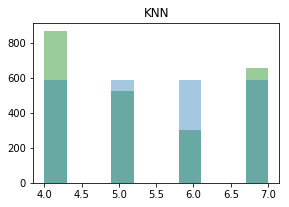

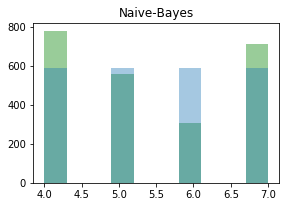

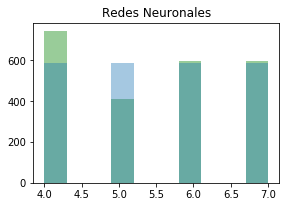

In [48]:
#Aplicar los metodos de clasificación a los datos para entrenarlos y evaluar el resultado.
#Las metricas usadas para evaluar el sistema son accuracy, confusion_matrix y classification_report.
#A cada método se le aplica Cross-validation.
#Por último se grafica el resultado comparando la "y" de salida con "y_pred" del resultado de la predicción.
met2 = [linear_model.LogisticRegression(),SVC(),DecisionTreeClassifier(max_depth=12, random_state=1),
       RandomForestClassifier(max_depth=3,random_state=1),KNeighborsClassifier(n_neighbors=12),GaussianNB(),
       MLPClassifier()]
m2 = ['Regresion Logistica','SVM','Decision Tree','Random Forest','KNN','Naive-Bayes','Redes Neuronales']
for i in range (0,len(met2)):
    met2[i].fit(x,y)
    y_pred2=met2[i].predict(x)
    print ('Método: ',i+1,met2[i])
    scorer2 = accuracy_score(y, y_pred2) 
    print ('Accuracy: ',scorer2)
    scores2 = cross_val_score(met2[i], x, y, cv=10)
    s2 = np.mean(np.sqrt(abs(scores2)))
    print ('Cross-Validation: ',s2)
    print('Confusion_matrix: \n',confusion_matrix(y, y_pred2))
    print('Classification_report: \n',classification_report(y,y_pred2))
    print ('\n')
      
    for j in range (0,len(y_pred2)):
        y_pred2[j]=round(y_pred2[j])
    
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i+1)
    plt.hist(y_pred2,alpha=0.4,color='green')
    plt.hist(y,alpha=0.4)
    b = m2[i]
    plt.title(b)

### Hyperparameter tuning para SVM

In [7]:
#Importar librerias para aplicar hiperparametrización.
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
pca = PCA(n_components=11, whiten=True)  #Buscar 11 componentes fundamentales
model = make_pipeline(pca, SVC()) #Análisis de componentes principales PCA para el clasificador SVM
#Ajustar C y gamma para mejorar los parametros del modelo
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
#Predecir con el modelo luego de hiperparametrizar.
model = grid.best_estimator_
yfit = model.predict(x)

In [52]:
print('Confusion_matrix: \n',confusion_matrix(y, yfit))
print('\n')
print('Classification_report: \n',classification_report(y,yfit))

Confusion_matrix: 
 [[533  32  21   2]
 [ 92 381  92  23]
 [ 54 140 253 141]
 [  9   5  79 495]]


Classification_report: 
               precision    recall  f1-score   support

         4.0       0.77      0.91      0.84       588
         5.0       0.68      0.65      0.66       588
         6.0       0.57      0.43      0.49       588
         7.0       0.75      0.84      0.79       588

   micro avg       0.71      0.71      0.71      2352
   macro avg       0.69      0.71      0.70      2352
weighted avg       0.69      0.71      0.70      2352



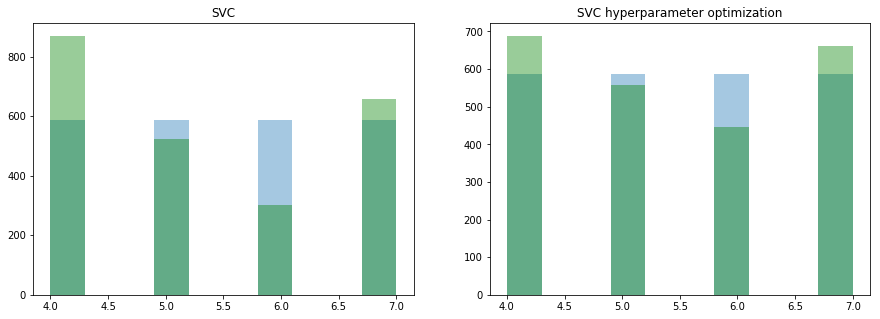

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sv = KNeighborsClassifier(n_neighbors=12)
sv.fit(x,y)
y2 = sv.predict(x)
plt.hist(y,alpha=0.4)
plt.hist(y2,alpha=0.4,color='green')
plt.title("SVC");

plt.subplot(1,2,2)
plt.hist(y,alpha=0.4)
plt.hist(yfit,alpha=0.4,color='green')
plt.title("SVC hyperparameter optimization");

#Graficar el modelo SVC y SVC aplicando hyperparametrizacion para comparar resultados
#Se observa que aplicando hiperparametrización mejora la predicción del modelo.

### CONCLUSIONES

### Predicción:
En los metodos de predicción basandonos en la medida de evaluacion r2_score para elegir el mejor modelo, se encuentra que el mejor modelo es el DesicionTreeRegressor con un r2_score de 0.940 y el modelo con el desempeño más bajo es LinearRegression con un r2_score de 0.5177. En las graficas se puede observar la comparacion de las variables de salida iniciales (se encuentran en el dataset) con las que predijo el modelo, con lo que se puede comprobar los resultados obtenidos con la medida de evaluacion y se evidencia que el mejor modelo de prediccion es el DesicionTreeRegressor donde la variable de salida que predijo es la que mas se aproxima a la variable de salida inicial. Por el contrario, se observa la diferencia de los datos que predijo el modelo LinearRegression en relación a los valores de salida iniciales.

### Clasificación:
En los metodos de clasificación basandonos en la medida de evaluación accuracy para elegir el mejor modelo, se encuentra que el mejor modelo es el DesicionTreeClassifier con un accuracy de 0.947 y el modelo con el desempeño más bajo es Naive-Bayes con un accuracy de 0.5548. En las graficas se puede observar la comparacion de las variables de salida iniciales con las que predijo el modelo, con lo que se puede comprobar los resultados obtenidos con la medida de evaluacion y se evidencia que el mejor modelo de prediccion es el DesicionTreeClassifier donde la variable de salida que predijo es la que mas se aproxima a la variable de salida inicial. Por el contrario, se observa la diferencia de los datos que predijo el modelo Naive-Bayes en relación a los valores de salida iniciales, y al igual que este modelo regresión logistica y KNN no se aproximan a los datos de salida iniciales.

#### En conclusion para la base de datos presentada "Calidad_Vino" el mejor método a implementar para predecir un resultado tanto en predicción como en clasificación es Desicion Tree.